In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\filic\Downloads\movies.csv')

In [14]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [22]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [24]:
df_cleaned = df.dropna()


In [30]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [36]:
# removing decimal numbers

df['budget'] = df['budget'].fillna(df['budget'].median()).astype('int64')
df['gross'] = df['gross'].fillna(df['gross'].median()).astype('int64')


In [44]:
# Create correct Year column

df['yearcorrect'] = df['released'].str.split(',').str[-1].str.strip().str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,20205757,NaN,120.0,2020


In [60]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

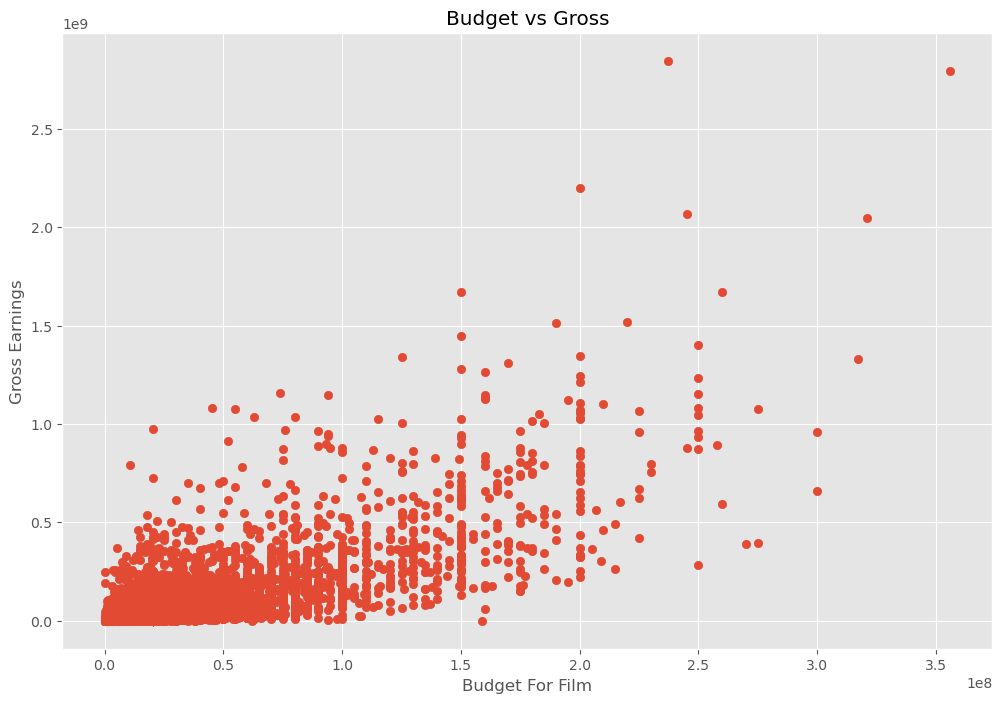

In [54]:
# Scatter plot wtih Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')

plt.xlabel('Budget For Film')

plt.show()

In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


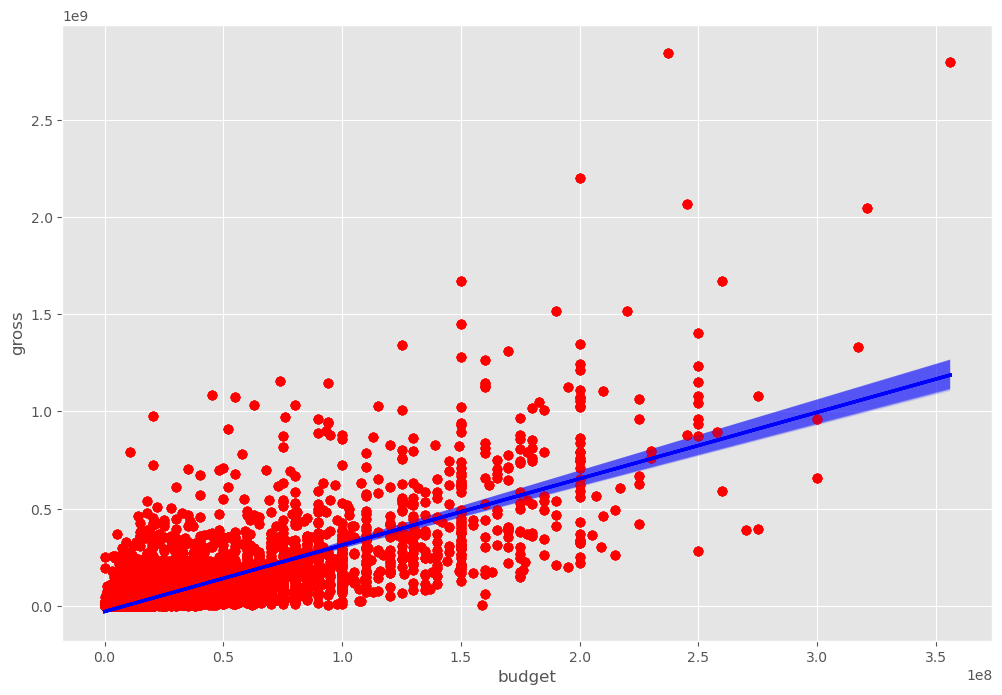

In [75]:
# Plot Budget vs Gross using seaborn 

sns.regplot(x='budget' , y='gross', data=df, scatter_kws={"color":"red"} ,line_kws={"color":"blue"})
plt.show()

In [107]:

# Remove NaN
df_numeric = df_numeric.dropna()

# Correlation 
correlation_matrix = df_numeric.corr(method='pearson')

print(correlation_matrix)





             year     score     votes    budget     gross   runtime
year     1.000000  0.098526  0.223182  0.292869  0.260199  0.120785
score    0.098526  1.000000  0.409186  0.061892  0.185490  0.399451
votes    0.223182  0.409186  1.000000  0.460926  0.632108  0.309212
budget   0.292869  0.061892  0.460926  1.000000  0.745901  0.273490
gross    0.260199  0.185490  0.632108  0.745901  1.000000  0.244418
runtime  0.120785  0.399451  0.309212  0.273490  0.244418  1.000000


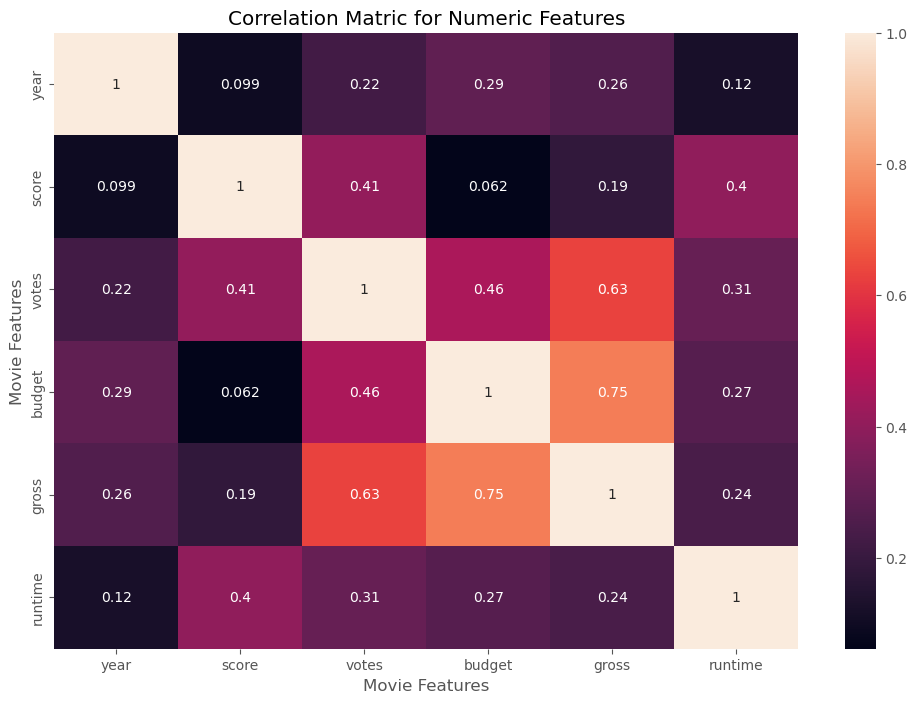

In [111]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')

plt.show()

In [123]:
from scipy import stats

# Calculate the median budget
median_budget = df['budget'].median()

# Split the dataset into two groups based on budget:
# - High-budget movies: movies with a budget greater than the median
# - Low-budget movies: movies with a budget lower than or equal to the median
high_budget = df[df['budget'] > median_budget]['gross']
low_budget = df[df['budget'] <= median_budget]['gross']

# Perform an independent T-test to compare the average gross revenue 
# between high-budget and low-budget movies
# "equal_var=False" is used when the two groups may have different variances
t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)

# Print the test results
print(f"T-statistic: {t_stat}")  # Measures how different the means are
print(f"P-value: {p_value}")  # If p-value < 0.05, the difference is statistically significant



T-statistic: 32.52385764577476
P-value: 8.465309535391849e-198


In [127]:
# Create groups based on genre
action = df[df['genre'] == 'Action']['gross']
comedy = df[df['genre'] == 'Comedy']['gross']
drama = df[df['genre'] == 'Drama']['gross']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(action, comedy, drama)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 260.05916997441506
P-value: 1.2997572614343673e-108
